WHAT IS AN API? Basically API lets two softwares talk to each other. No need to know how API works, just need to know its inputs and outputs

In [21]:
# PANDAS IS AN API... BUT HOW? Lets see.

import pandas as pd
import matplotlib.pyplot as plt

#creating a dictionary
dict_ = {'a':[11,21,31],'b':[12,22,32]}

#when we create pandas object with dataframe constructor, in API lingo its an instance. The data in Dictionary is passed along to pandas API.
#then we use dataframe to communicate with API(perform operations such as head(), mean())
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

REST API'S (Representational state transfer API )  
Rest Api function by sending request, the request is communicated with Http message. The Http message contains JSON file. The JSON file contains instructions for what operation we would like the service or resource to perform. In similar manner API returns with a response, VIA an http message, usually contained with a JSON.  
Furthermore, in the notebook we will be studying NBI API  
It is quiet simple to use nba_api to make request for a specific team. We do not need a JSON file, all we need is an ID. The information is stored locally in the API.


In [5]:
# ! pip install nba_api
from nba_api.stats.static import teams
import matplotlib as plt

In [6]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict
    

In [7]:
# the get_teams method returns a list of dictionaries
nba_teams = teams.get_teams()

In [8]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [9]:
# To make things easier we can convert dictionary into table
# First we use function one_dict to create a dictionary

dict_nba_team = one_dict(nba_teams)
df_teams = pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [10]:
# We will use teams nick name to find the unique ID, we can see the row that contains info about the warriors are follows
df_warriors = df_teams[df_teams['nickname']== 'Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [11]:
# use the following line of code to access the first column
id_warriors = df_warriors[['id']].values[0][0]
id_warriors

1610612744

In [12]:
# The function leaguegamefinder will make an API call  in its module stats.endpoints

from nba_api.stats.endpoints import leaguegamefinder

In [15]:
# We can download the dataframe from API call for golden state warriors

import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Golden_State.pkl")

In [16]:

file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


In [17]:
# creating two data frames one when warriors faced raptors at home and other for away games
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

In [18]:
#calculating means for columns plus minus for dataframe home and away
games_home['PLUS_MINUS'].mean()

3.730769230769231

In [19]:
games_away['PLUS_MINUS'].mean()

-0.6071428571428571

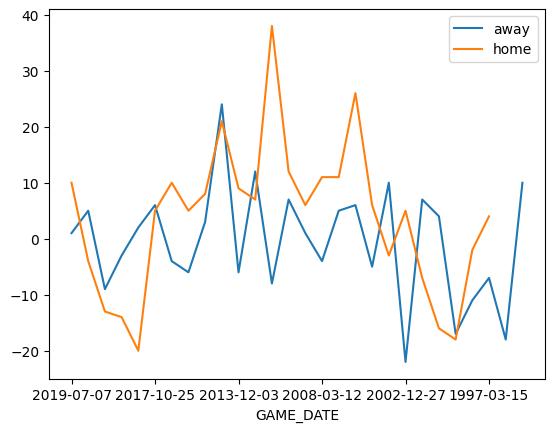

In [23]:
# plotting plus minus column for both of our dataframes

fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

#we can see the warrior played better at home

In [24]:
# now calculating the mean for column PTS for data frame games_home and games_away

games_home['PTS'].mean()


106.8076923076923

In [25]:
games_away['PTS'].mean()

102.96428571428571

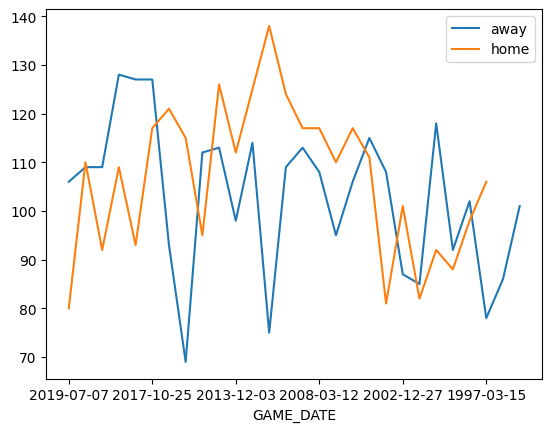

In [26]:
# plotting PTS column for both dataframes
fig, ax = plt.subplots()
games_away.plot(x='GAME_DATE',y='PTS', ax=ax)
games_home.plot(x='GAME_DATE',y='PTS', ax=ax)
ax.legend(["away", "home"])
plt.show()